# Task 6.4

## 1. Import libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
# Import data
df_all = pd.read_pickle(r'/Users/marianino/Desktop/Happiness Data/Data/Cleaned Data/df_all.pkl')

## 2. Clean data 

In [7]:
df_all.columns

Index(['Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [8]:
df_all.head()

,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
Country,,,,,,,,,,
Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [10]:
df_all.shape

(781, 10)

In [12]:
# Rename columns
df_all.rename(columns = {'X1 Economy (GDP per Capita)' : 'Economy (GDP per Capita)', 'X2 Family' : 'Family', 'X3 Health (Life Expectancy)' : 'Health (Life Expectancy)', 'Y Happiness Score' : 'Happiness Score'}, inplace = True)

In [14]:
# Check for missing values
df_all.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
Year                             0
dtype: int64

Missing value in a column that we won't use for this analysis. 

### Checking for outliers 

/var/folders/zq/gd226qtd2tq509tvr0_wm2kc0000gn/T/ipykernel_38585/381079428.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all['Economy (GDP per Capita)'], bins=25)
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Density'>

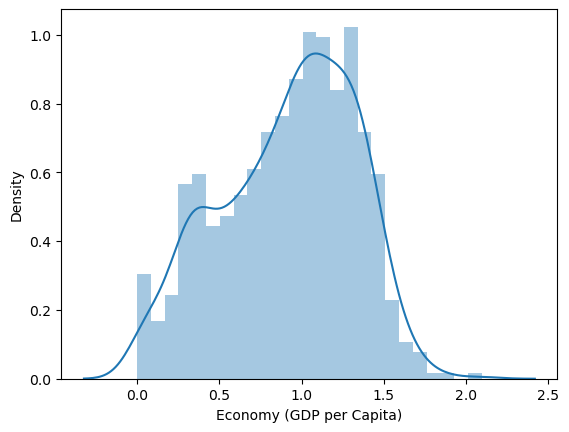

In [15]:
# Shows extreme values
sns.distplot(df_all['Economy (GDP per Capita)'], bins=25)

No outliers for the gdp

In [16]:
#Check mean, median and max

df_all['Economy (GDP per Capita)'].mean()

0.9168260323965223

In [17]:
df_all['Economy (GDP per Capita)'].median()

0.982409417629242

In [18]:
df_all['Economy (GDP per Capita)'].max()

2.096

## 3. Data preparation

Can money buy happiness?
As the GDP per Capita increases so will the happiness score.

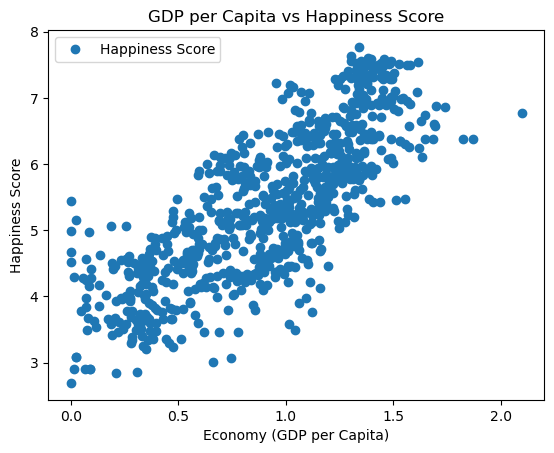

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_all.plot(x = 'Economy (GDP per Capita)', y='Happiness Score',style='o') 
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_all['Economy (GDP per Capita)'].values.reshape(-1,1)
y = df_all['Happiness Score'].values.reshape(-1,1)

In [25]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [26]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [27]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis 

In [29]:
# Create a regression object.
# This is the regression object, which will be fit onto the training set.
regression = LinearRegression() 

In [30]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

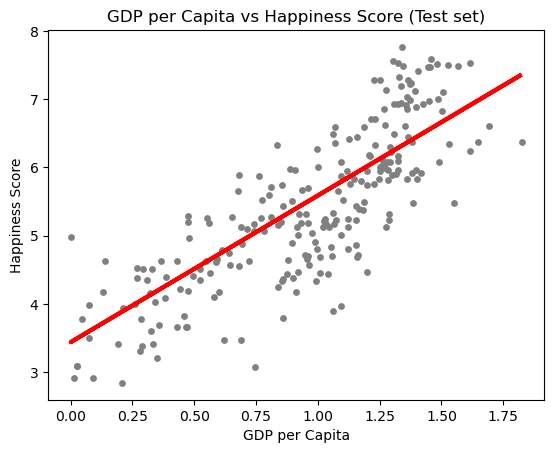

In [32]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15) 
plot_test.plot(X_test, y_predicted, color='red', linewidth =3) 
plot_test.title('GDP per Capita vs Happiness Score (Test set)') 
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [33]:
# Create objects that contain the model summary statistics.

# This is the mean squared error
rmse = mean_squared_error(y_test, y_predicted) 

# This is the R2 score.
r2 = r2_score(y_test, y_predicted) 

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.15202168]]
Mean squared error:  0.46762721850326283
R2 score:  0.6444975115717575


The regression analysis on the test set data for GDP per capita vs happiness score reveals a strong positive relationship, with a slope coefficient of 2.15. This indicates that higher GDP per capita is associated with increased happiness scores.

The mean squared error of 0.46 suggests moderate accuracy in predictions, while the R2 score of 0.64 indicates that approximately 64% of the variance in happiness scores can be explained by GDP per capita.

Overall, the results highlight the significant influence of economic prosperity on happiness levels, emphasizing the importance of considering such factors in understanding well-being.

In [35]:
y_predicted

array([[5.80805631],
       [6.44547854],
       [6.73088731],
       [6.43796799],
       [4.05070881],
       [5.92656824],
       [4.26548058],
       [5.03024452],
       [6.50442242],
       [5.99030444],
       [5.72166757],
       [5.94388533],
       [4.68082076],
       [5.40390005],
       [3.46987816],
       [6.36258267],
       [4.46170298],
       [5.37505594],
       [5.84923941],
       [5.28273954],
       [7.36282083],
       [3.59404981],
       [5.50289305],
       [6.22166829],
       [7.07477272],
       [5.27693077],
       [6.08178688],
       [6.32066128],
       [4.36465737],
       [6.391678  ],
       [6.98563598],
       [5.92253727],
       [5.90581606],
       [3.84798837],
       [6.37446183],
       [5.41250813],
       [3.49290479],
       [5.68247925],
       [6.21567581],
       [6.04483667],
       [4.14763587],
       [6.43916584],
       [6.03229038],
       [5.72020419],
       [6.29914107],
       [6.1273667 ],
       [6.15495562],
       [5.184

In [37]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

data.head(20)

,Actual,Predicted
0,5.525,5.808056
1,6.886,6.445479
2,6.344,6.730887
3,7.119,6.437968
4,3.781,4.050709
5,4.692,5.926568
6,4.390,4.265481
7,5.061,5.030245
8,6.929,6.504422
9,5.488,5.990304


In [38]:
# Predict.
# This is predicting X_train

y_predicted_train = regression.predict(X_train) 

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.15202168]]
Mean squared error:  0.4854384453894657
R2 score:  0.6118285263677128


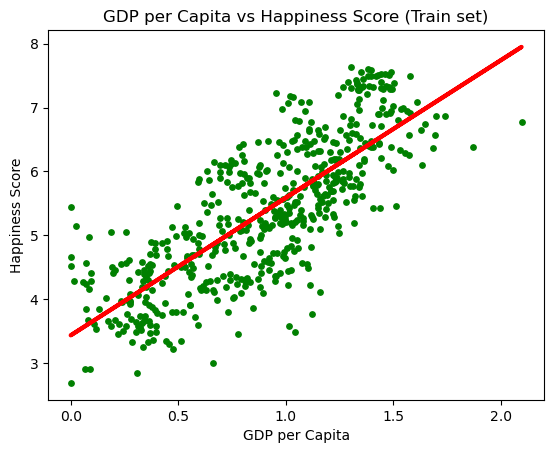

In [41]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15) 
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3) 
plot_test.title('GDP per Capita vs Happiness Score (Train set)') 
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

Overall, these results suggest a significant positive association between GDP per capita and happiness scores, with the linear regression model explaining a substantial portion of the variability in happiness scores based on variations in GDP per capita. However, it is important to note that other factors may also influence happiness scores and should be considered in future analyses. As we have seen in past analysis, the family score and the health (Life Expectancy) score are also important variables that contribute to the Happiness Score. 